# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [37]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [39]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name

    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 605


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):

    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}?q={city}&appid={weather_api_key}&units=metric"

    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Request data from the API
        response = requests.get(city_url)
        city_weather = response.json()

        # Parse the JSON and retrieve specific data
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

    except Exception as e:
        print(f"City not found. Skipping {city}. Error: {e}")

        # Append the city data to the list
        city_data.append({
            "City": city,
            "Lat": city_lat,
            "Lng": city_lng,
            "Max Temp": city_max_temp,
            "Humidity": city_humidity,
            "Cloudiness": city_clouds,
            "Wind Speed": city_wind,
            "Country": city_country,
            "Date": city_date
        })


    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass

    # pause to avoid rate limiting
    time.sleep(1)

# Indicate that Data Loading is complete
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | myrina
Processing Record 2 of Set 1 | puerto natales
Processing Record 3 of Set 1 | yeppoon
Processing Record 4 of Set 1 | iqaluit
Processing Record 5 of Set 1 | sanctuary point
Processing Record 6 of Set 1 | rey bouba
Processing Record 7 of Set 1 | ust-nera
Processing Record 8 of Set 1 | ilulissat
Processing Record 9 of Set 1 | isafjordur
Processing Record 10 of Set 1 | zhezqazghan
Processing Record 11 of Set 1 | edinburgh of the seven seas
Processing Record 12 of Set 1 | ta`u
Processing Record 13 of Set 1 | hermanus
Processing Record 14 of Set 1 | albany
Processing Record 15 of Set 1 | yellowknife
Processing Record 16 of Set 1 | fale old settlement
Processing Record 17 of Set 1 | nar'yan-mar
Processing Record 18 of Set 1 | whitehorse
Processing Record 19 of Set 1 | longyearbyen
Processing Record 20 of Set 1 | tolanaro
Processing Record 21 of Set 1 | beira
Processing Record 22 of Set 1 | ain leu

In [45]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          25
Lat           25
Lng           25
Max Temp      25
Humidity      25
Cloudiness    25
Wind Speed    25
Country       25
Date          25
dtype: int64

In [47]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,taiohae,36.9221,-5.5430,14.33,83,100,2.85,ES,1730222668
1,puerto san carlos,-28.8667,153.5667,18.16,81,87,2.14,AU,1730222868
2,ouellah,-3.5000,29.9500,19.80,80,73,0.70,BI,1730222907
3,kataragama,-5.1989,-35.4608,29.01,52,82,8.38,BR,1730222922
4,seogwipo,-5.1989,-35.4608,29.01,52,82,8.38,BR,1730222922


In [51]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [53]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taiohae,36.9221,-5.5430,14.33,83,100,2.85,ES,1730222668
1,puerto san carlos,-28.8667,153.5667,18.16,81,87,2.14,AU,1730222868
2,ouellah,-3.5000,29.9500,19.80,80,73,0.70,BI,1730222907
3,kataragama,-5.1989,-35.4608,29.01,52,82,8.38,BR,1730222922
4,seogwipo,-5.1989,-35.4608,29.01,52,82,8.38,BR,1730222922


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

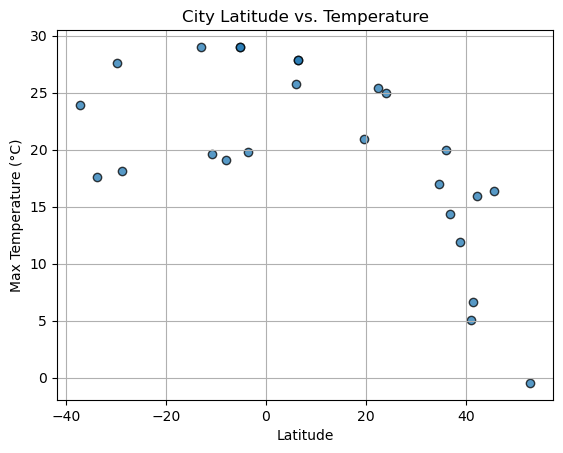

In [67]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], edgecolor="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Temperature")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (°C)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

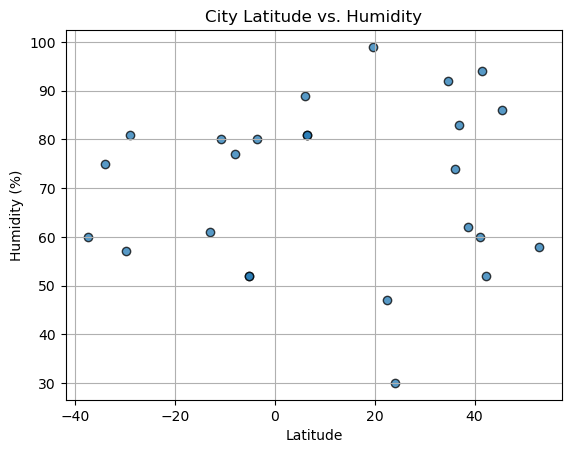

In [71]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], edgecolor="black", alpha=0.75)

# Incorporate the other graph properties
plt.title("City Latitude vs. Humidity")
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.grid(True)
      
# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

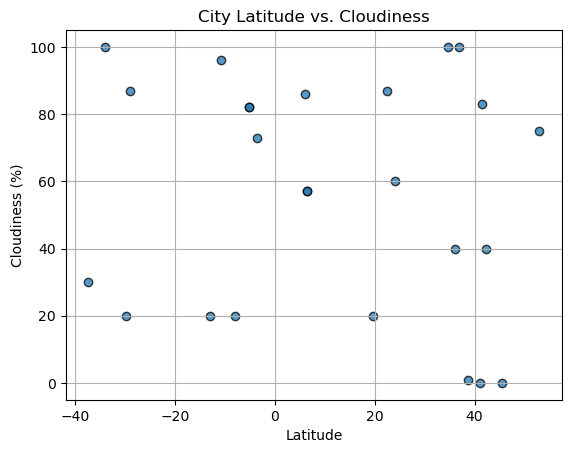

In [75]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], edgecolor="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Cloudiness")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness (%)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

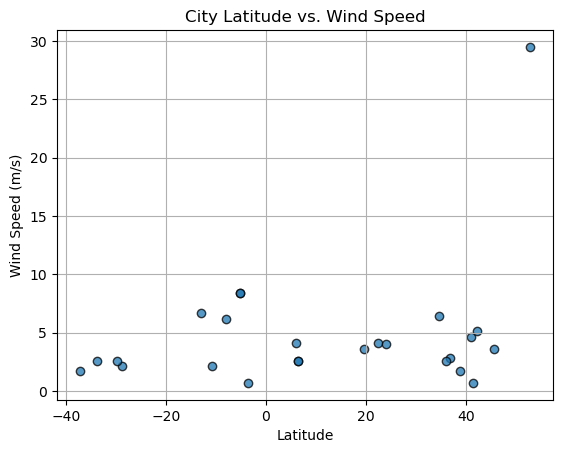

In [77]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], edgecolor="black", alpha=0.75)


# Incorporate the other graph properties
plt.title("City Latitude vs. Wind Speed")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
plt.grid(True)

# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [79]:
# Define a function to create Linear Regression plots
def plot_linear_regression(x_values, y_values, x_label, y_label, title, output_path):
    """
    Plots a scatter plot with a linear regression line.

    Parameters:
    x_values (list or pandas.Series): Values for the x-axis.
    y_values (list or pandas.Series): Values for the y-axis.
    x_label (str): Label for the x-axis.
    y_label (str): Label for the y-axis.
    title (str): Title of the plot.
    output_path (str): File path to save the plot image.
    """
    # Perform linear regression
    slope, intercept, r_value, p_value, std_err = linregress(x_values, y_values)
    
    # Calculate regression line
    regression_line = slope * x_values + intercept

    # Plot scatter plot and regression line
    plt.scatter(x_values, y_values, edgecolor="black", alpha=0.75)
    plt.plot(x_values, regression_line, color="red")
    
    # Annotate with regression equation and R-squared value
    plt.annotate(f"y = {slope:.2f}x + {intercept:.2f}\nR² = {r_value**2:.2f}",
                 xy=(0.05, 0.9), xycoords="axes fraction", fontsize=12, color="red")

    # Set labels and title
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.title(title)
    plt.grid(True)
    
    # Save and display plot
    plt.savefig(output_path)
    plt.show()

In [81]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"] >= 0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,taiohae,36.9221,-5.5430,14.33,83,100,2.85,ES,1730222668
6,kulia village,40.9730,-117.7357,5.03,60,0,4.63,US,1730222994
8,do'stlik shahri,34.6667,138.9500,16.97,92,100,6.41,JP,1730223046
10,abraham's bay,38.7666,-120.5177,11.92,62,1,1.76,US,1730223102
11,laayoune plage,19.5933,-154.9731,20.96,99,20,3.60,US,1730222918


In [83]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"] <= 0]
# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,puerto san carlos,-28.8667,153.5667,18.16,81,87,2.14,AU,1730222868
2,ouellah,-3.5000,29.9500,19.80,80,73,0.70,BI,1730222907
3,kataragama,-5.1989,-35.4608,29.01,52,82,8.38,BR,1730222922
4,seogwipo,-5.1989,-35.4608,29.01,52,82,8.38,BR,1730222922
5,'ohonua,-12.8944,-38.3272,29.01,61,20,6.69,BR,1730222932


###  Temperature vs. Latitude Linear Regression Plot

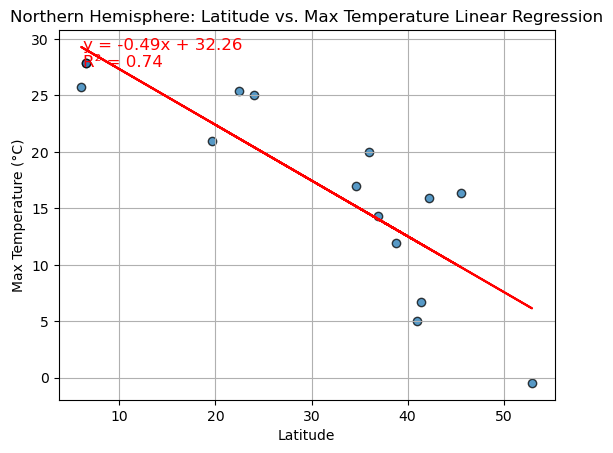

In [89]:
# Linear regression on Northern Hemisphere

plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Max Temp"], 
    x_label="Latitude", 
    y_label="Max Temperature (°C)", 
    title="Northern Hemisphere: Latitude vs. Max Temperature Linear Regression", 
    output_path="../output_data/Fig_NorthernHemisphere_Latitude_MaxTemp_Regression.png"
)

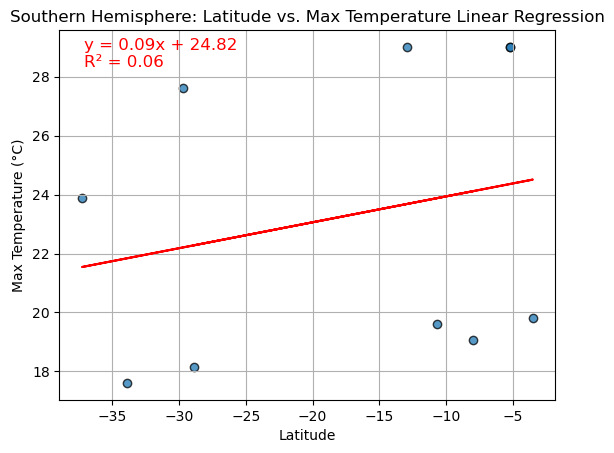

In [93]:
# Linear regression on Southern Hemisphere

plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Max Temp"], 
    x_label="Latitude", 
    y_label="Max Temperature (°C)", 
    title="Southern Hemisphere: Latitude vs. Max Temperature Linear Regression", 
    output_path="../output_data/Fig_SouthernHemisphere_Latitude_MaxTemp_Regression.png"
)

**Discussion about the linear relationship:** Generally, there is a negative correlation between latitude and temperature in the Northern Hemisphere. This means that as latitude increases (moving further north), the temperature tends to decrease.

### Humidity vs. Latitude Linear Regression Plot

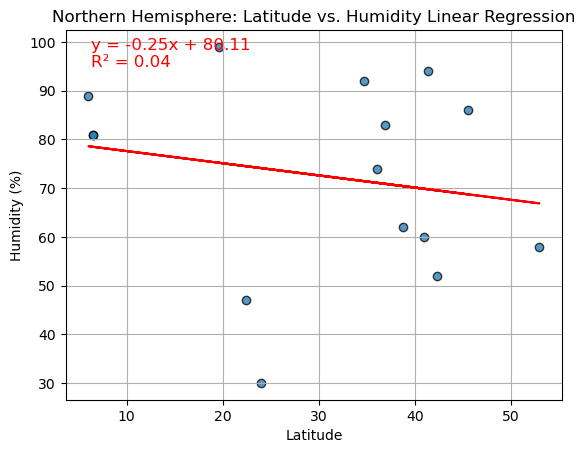

In [97]:
# Linear regression on Latitude vs. Humidity for the Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Humidity"], 
    x_label="Latitude", 
    y_label="Humidity (%)", 
    title="Northern Hemisphere: Latitude vs. Humidity Linear Regression", 
    output_path="../output_data/Fig_NorthernHemisphere_Latitude_Humidity_Regression.png"
)


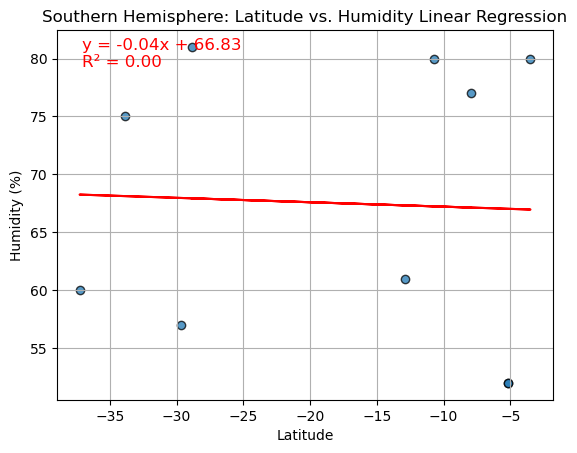

In [99]:
# Linear regression on Latitude vs. Humidity for the Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Humidity"], 
    x_label="Latitude", 
    y_label="Humidity (%)", 
    title="Southern Hemisphere: Latitude vs. Humidity Linear Regression", 
    output_path="../output_data/Fig_SouthernHemisphere_Latitude_Humidity_Regression.png"
)


**Discussion about the linear relationship:** While the linear regression line may have a positive or negative slope, the R-squared value is typically low, indicating a weak linear relationship. This suggests that latitude alone is not a strong predictor of humidity in the Northern Hemisphere.

### Cloudiness vs. Latitude Linear Regression Plot

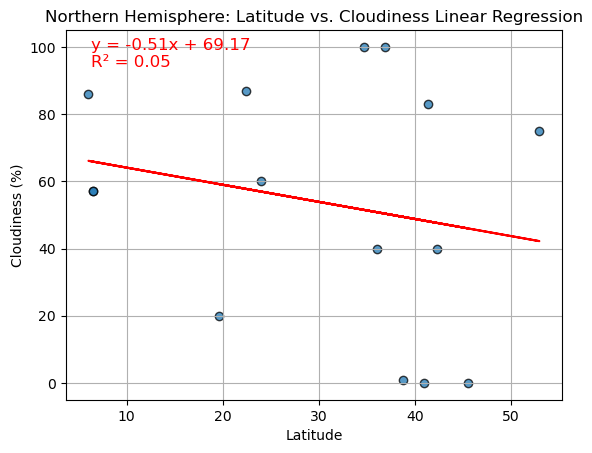

In [101]:
# Linear regression on Latitude vs. Cloudiness for the Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Cloudiness"], 
    x_label="Latitude", 
    y_label="Cloudiness (%)", 
    title="Northern Hemisphere: Latitude vs. Cloudiness Linear Regression", 
    output_path="../output_data/Fig_NorthernHemisphere_Latitude_Cloudiness_Regression.png"
)


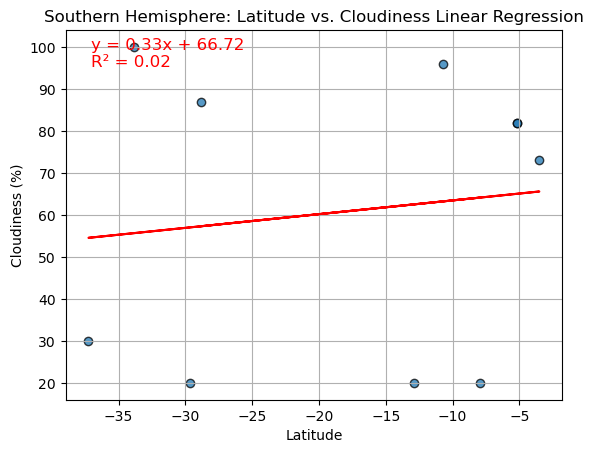

In [103]:
# Linear regression on Latitude vs. Cloudiness for the Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Cloudiness"], 
    x_label="Latitude", 
    y_label="Cloudiness (%)", 
    title="Southern Hemisphere: Latitude vs. Cloudiness Linear Regression", 
    output_path="../output_data/Fig_SouthernHemisphere_Latitude_Cloudiness_Regression.png"
)


**Discussion about the linear relationship:** In the Southern Hemisphere, the linear regression between latitude and cloudiness also generally yields a weak relationship, evidenced by a low R-squared value.

### Wind Speed vs. Latitude Linear Regression Plot

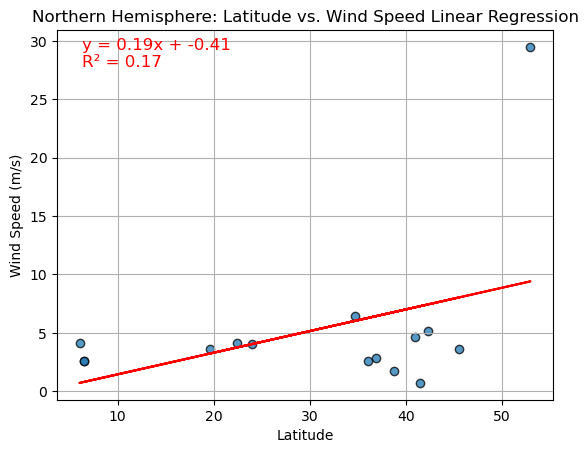

In [107]:
# Linear regression on Latitude vs. Wind Speed for the Northern Hemisphere
plot_linear_regression(
    northern_hemi_df["Lat"], 
    northern_hemi_df["Wind Speed"], 
    x_label="Latitude", 
    y_label="Wind Speed (m/s)", 
    title="Northern Hemisphere: Latitude vs. Wind Speed Linear Regression", 
    output_path="../output_data/Fig_NorthernHemisphere_Latitude_WindSpeed_Regression.png"
)


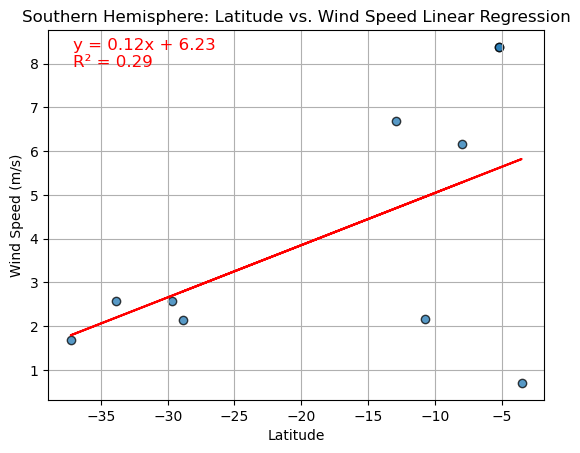

In [105]:
# Perform linear regression on Latitude vs. Wind Speed for the Southern Hemisphere
plot_linear_regression(
    southern_hemi_df["Lat"], 
    southern_hemi_df["Wind Speed"], 
    x_label="Latitude", 
    y_label="Wind Speed (m/s)", 
    title="Southern Hemisphere: Latitude vs. Wind Speed Linear Regression", 
    output_path="../output_data/Fig_SouthernHemisphere_Latitude_WindSpeed_Regression.png"
)


**Discussion about the linear relationship:** The R-squared value in the linear regression plot for wind speed versus latitude is likely low, indicating that latitude alone does not explain much of the variance in wind speeds across different regions. This low R-squared value suggests that other factors, may play a more significant role in determining wind speed than latitude.